**Cloning Git repository**

In [2]:
!git clone https://github.com/Adu3108/Binarized_VAE.git

fatal: destination path 'Binarized_VAE' already exists and is not an empty directory.


**Extracting the necessary code**

In [3]:
!mv /content/Binarized_VAE/Second\ VAE/Normal\ Version/vae.py /content/

**Install all the dependencies**

In [4]:
!pip install torch 
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Install Dataset**

**MNIST Dataset**

In [ ]:
!mv /content/Binarized_VAE/Datasets/MNIST\ Dataset\ JPG\ format.zip /content/ 

**Preprocessing of Dataset**

There will be 2 directories :- 
1.   Training
2.   Testing

Each directory consists of 10 classes named 0,1,2,...,9

Each class contains 10 images

In [ ]:
import os

os.rename('/content/MNIST Dataset JPG format.zip','MNIST.zip')

In [ ]:
!jar xvf /content/MNIST.zip

In [ ]:
os.rename('/content/MNIST Dataset JPG format', 'MNIST')
os.rename('/content/MNIST/MNIST - JPG - training','/content/MNIST/Training')
os.rename('/content/MNIST/MNIST - JPG - testing', '/content/MNIST/Testing')
os.mkdir("/content/MNIST/Validation")
for i in range(10):
  path = os.path.join('/content/MNIST/Validation',str(i))
  os.mkdir(path)

In [ ]:
os.chdir('/content/MNIST/Training')
arr = os.listdir()
for i in arr:
  tmp = os.path.join('/content/MNIST/Training',i)
  os.chdir(tmp)
  val = os.listdir()[10:20]
  rem = os.listdir()[20:]
  for j in val:
    original_path = os.path.join(tmp,j)
    val_path = os.path.join('/content/MNIST/Validation',i)
    val_path = os.path.join(val_path,j)
    os.replace(original_path,val_path)
  for j in rem:
    os.remove(j)
os.chdir('/content/MNIST/Testing')
arr = os.listdir()
for i in arr:
  tmp = os.path.join('/content/MNIST/Testing',i)
  os.chdir(tmp)
  rem = os.listdir()[10:]
  for j in rem:
    os.remove(j)
os.chdir('/content')

**Caltech-101 Dataset**

In [5]:
!mv /content/Binarized_VAE/Datasets/Caltech-101 /content/

**Creating Training, Validation, Testing dataset**

In [6]:
import os

os.mkdir('/content/Dataset')
os.mkdir('/content/Dataset/Training')
os.mkdir('/content/Dataset/Testing')
os.mkdir('/content/Dataset/Validation')
os.chdir("/content/Caltech-101/")
l = os.listdir()
os.chdir('/content/Dataset/Training')
for i in l:
  path = os.path.join('/content/Dataset/Training',i)
  os.mkdir(path)
os.chdir('/content/Dataset/Validation')
for i in l:
  path = os.path.join('/content/Dataset/Validation',i)
  os.mkdir(path)  
os.chdir('/content/Dataset/Testing')
for i in l:
  path = os.path.join('/content/Dataset/Testing',i)
  os.mkdir(path)

In [7]:
for i in l:
  path = os.path.join('/content/Caltech-101/',i)
  os.chdir(path)
  training = os.listdir()[:10]
  validation = os.listdir()[10:20]
  testing = os.listdir()[20:30]
  rem = os.listdir()[30:]
  for j in training:
    original_path = os.path.join(path,j)
    val_path = os.path.join('/content/Dataset/Training',i)
    val_path = os.path.join(val_path,j)
    os.replace(original_path,val_path)
  for j in validation:
    original_path = os.path.join(path,j)
    val_path = os.path.join('/content/Dataset/Validation',i)
    val_path = os.path.join(val_path,j)
    os.replace(original_path,val_path)
  for j in testing:
    original_path = os.path.join(path,j)
    val_path = os.path.join('/content/Dataset/Testing',i)
    val_path = os.path.join(val_path,j)
    os.replace(original_path,val_path)
  for j in rem:
    os.remove(j)
  os.chdir('/content')

**Training**

In [ ]:
os.environ["CUBLAS_WORKSPACE_CONFIG"]=":4096:8"
!python vae.py train --epochs 100 --batch 1 --n_latent 30 --dimensions 120x160 --train_set /content/Dataset/Training --validation_set /content/Dataset/Validation --weights /content/weights.pt
#!python vae_v2.py train --epochs 100 --batch 1 --n_latent 30 --dimensions 120x160 --train_set /content/Dataset/Training --validation_set /content/Dataset/Validation --weights /content/weights.pt

Using device: cuda
----------------------------------------------------
Epoch: 0
Training Loss: 1595.455078125
Validation Loss: 1548.3023681640625
----------------------------------------------------
----------------------------------------------------
Epoch: 1
Training Loss: 1472.0
Validation Loss: 1496.90380859375
----------------------------------------------------
----------------------------------------------------
Epoch: 2
Training Loss: 1419.3216552734375
Validation Loss: 1469.748291015625
----------------------------------------------------
----------------------------------------------------
Epoch: 3
Training Loss: 1380.2305908203125
Validation Loss: 1424.6376953125
----------------------------------------------------
----------------------------------------------------
Epoch: 4
Training Loss: 1348.387451171875
Validation Loss: 1406.8387451171875
----------------------------------------------------
----------------------------------------------------
Epoch: 5
Training Loss: 13

In [9]:
%matplotlib inline
%matplotlib notebook

**Fixing the final directory structure**

In [34]:
!mkdir Results
!mkdir /content/Results/Input
!mkdir /content/Results/Reconstructed

**Reconstruction**

In [35]:
!python vae_v2.py calibrate --batch 1 --n_latent 30 --dimensions 120x160 --cal_set /content/Dataset/Testing --weights weights.pt

**Comparison between original image and reconstructed image**

In [36]:
path = '/content/Results/Input'
os.chdir(path)
inputs = os.listdir()
for item in inputs:
    if not item.endswith(".png"):
        os.remove(os.path.join(path, item))
inputs.sort()
path = '/content/Results/Reconstructed'
os.chdir(path)
outputs = os.listdir()
for item in outputs:
    if not item.endswith(".png"):
        os.remove(os.path.join(path, item))
outputs.sort()
os.chdir('/content')

In [ ]:
!mv /content/Binarized_VAE/Datasets/Screenshot\ 2022-06-15\ at\ 4.58.08\ PM.png /content/
os.rename('/content/Screenshot 2022-06-15 at 4.58.08 PM.png','/content/white.png')

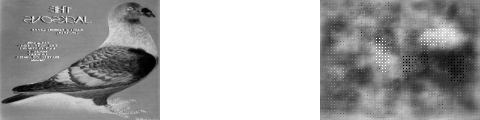

KL Loss : 45.743656
MSE Loss : 442.26132



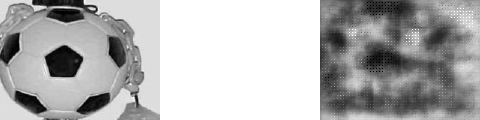

KL Loss : 55.084965
MSE Loss : 744.444



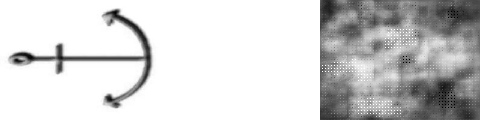

KL Loss : 36.2949
MSE Loss : 4470.413



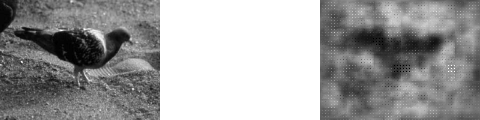

KL Loss : 69.178635
MSE Loss : 895.0707



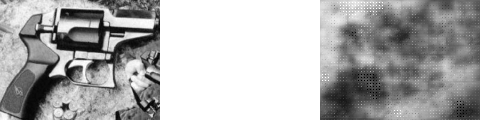

KL Loss : 58.24405
MSE Loss : 941.3146



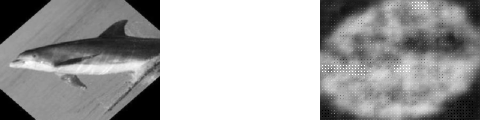

KL Loss : 61.928745
MSE Loss : 706.17883



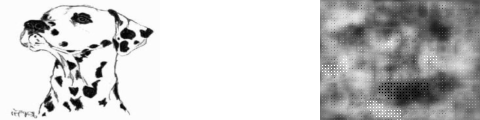

KL Loss : 40.727295
MSE Loss : 3760.819



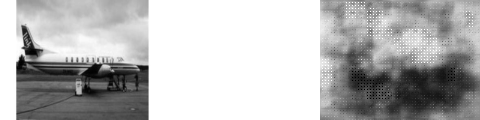

KL Loss : 66.495285
MSE Loss : 1016.4981



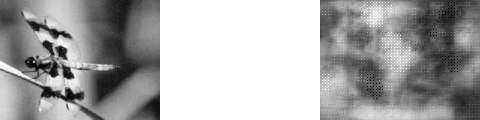

KL Loss : 49.809574
MSE Loss : 563.2033



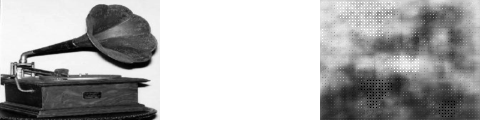

KL Loss : 67.924286
MSE Loss : 925.92957



In [37]:
import cv2
from google.colab.patches import cv2_imshow
import json

white = cv2.imread('white.png')
resized_white = cv2.resize(white, (160,120), interpolation = cv2.INTER_AREA)
with open('/content/kl_loss.json') as kl_json_file:
    kl_data = json.load(kl_json_file)
with open('/content/mse_loss.json') as mse_json_file:
    mse_data = json.load(mse_json_file)
for i in range(len(inputs[:10])):
  input_path = os.path.join('/content/Results/Input',inputs[i])
  output_path = os.path.join('/content/Results/Reconstructed',outputs[i])
  img1 = cv2.imread(input_path)
  img2 = cv2.imread(output_path)
  # scale_percent = 500 # percent of original size
  # width1 = int(img1.shape[1] * scale_percent / 100)
  # height1 = int(img1.shape[0] * scale_percent / 100)
  # dim1 = (width1, height1)
  # width2 = int(img2.shape[1] * scale_percent / 100)
  # height2 = int(img2.shape[0] * scale_percent / 100)
  # dim2 = (width2, height2)

  # resized1 = cv2.resize(img1, dim1, interpolation = cv2.INTER_AREA)
  # resized2 = cv2.resize(img2, dim2, interpolation = cv2.INTER_AREA)

  im_v = cv2.hconcat([img1, resized_white, img2])

  cv2_imshow(im_v)
  print("KL Loss : " + str(float(kl_data[inputs[i][:-4]][1:-1])))
  print("MSE Loss : " + str(float(mse_data[f'{int(inputs[i][:-4])}'][1:-1])))
  print()